# Deteksi Outlier
## Penjelasan Deteksi Outlier
### Identifikasi Outlier Menggunakan K-Nearest Neighbors (KNN) dalam Pemahaman Data
1. Apa yang Dimaksud dengan Deteksi Outlier?

Outlier merujuk pada data yang secara signifikan berbeda dari data lainnya dalam suatu dataset. Keberadaan outlier bisa disebabkan oleh berbagai faktor seperti kesalahan pengukuran, kesalahan input, atau memang data tersebut memiliki karakteristik unik dibandingkan data lainnya. Outlier dapat mempengaruhi hasil analisis dan performa model machine learning. Oleh karena itu, deteksi outlier diperlukan untuk mengidentifikasi data yang menyimpang dari pola umum.

2. Mengapa KNN Digunakan dalam Deteksi Outlier?

K-Nearest Neighbors (KNN) bekerja berdasarkan kedekatan antar data, sehingga dapat dimanfaatkan untuk mengidentifikasi outlier dengan mengukur jarak antara satu titik data dan tetangga terdekatnya.

Beberapa prinsip utama yang digunakan dalam deteksi outlier dengan KNN adalah:

Jika suatu titik data memiliki sedikit tetangga dalam radius tertentu, kemungkinan besar data tersebut merupakan outlier.
Jika rata-rata jarak ke k tetangga terdekatnya sangat besar, maka data tersebut dapat dikategorikan sebagai outlier.
3. Langkah-Langkah Deteksi Outlier Menggunakan KNN

a. Menghitung Jarak Antar Titik Data

Jarak antara satu titik dengan lainnya dapat diukur menggunakan metrik seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance.

b. Menentukan Nilai K (Jumlah Tetangga Terdekat)

Jumlah tetangga yang dipilih akan mempengaruhi hasil deteksi outlier:

Nilai K yang terlalu kecil bisa membuat model terlalu sensitif terhadap noise.
Nilai K yang terlalu besar dapat mengurangi akurasi dalam mendeteksi outlier.

c. Mengukur Skor Kepadatan (Density Score)

Ada beberapa cara untuk menentukan apakah suatu titik adalah outlier, antara lain:

K-Nearest Neighbor Distance
Menghitung rata-rata jarak ke K tetangga terdekat. Jika nilai ini terlalu besar, maka titik tersebut bisa dianggap outlier.
Local Outlier Factor (LOF)
LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal tetangganya. Jika kepadatan suatu titik jauh lebih rendah dibandingkan tetangganya, maka titik tersebut dapat diklasifikasikan sebagai outlier.
Distance-Based Outlier Score
Jika sebuah titik memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka kemungkinan besar titik tersebut adalah outlier.
4. Kelebihan dan Kekurangan KNN dalam Deteksi Outlier
Kelebihan:

Konsepnya mudah dipahami karena berbasis jarak.
Tidak bergantung pada distribusi data tertentu, sehingga fleksibel untuk berbagai dataset.
Dapat diterapkan pada data dengan dimensi tinggi.
Kekurangan:

Memerlukan komputasi yang tinggi, terutama jika dataset berukuran besar karena perlu menghitung jarak antar banyak titik.
Sensitif terhadap pemilihan nilai K, sehingga pemilihan yang tidak tepat dapat mengurangi efektivitas deteksi outlier.
Kesimpulan
Metode KNN dapat dimanfaatkan dalam proses pemahaman data untuk mendeteksi outlier dengan mengukur jarak antara suatu titik dan tetangga terdekatnya. Teknik seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF) memungkinkan kita mengidentifikasi data dengan kepadatan rendah atau yang jauh dari pola umum sebagai outlier. Keberhasilan deteksi outlier dengan KNN sangat bergantung pada pemilihan nilai K yang sesuai dan pemilihan metrik jarak yang tepat.

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

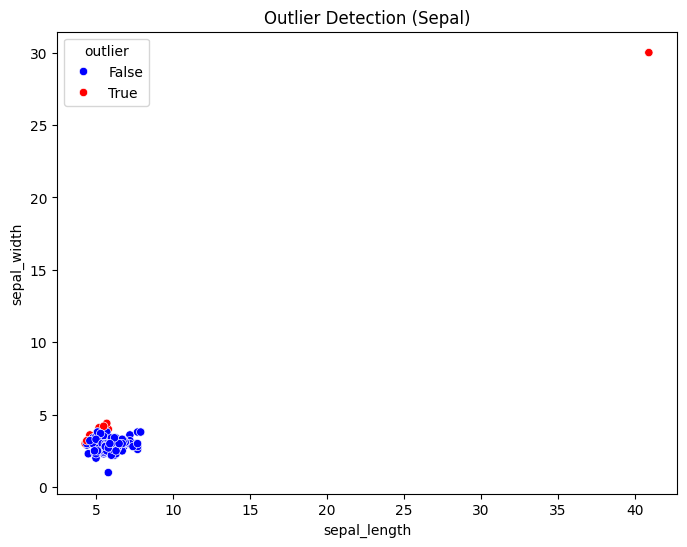

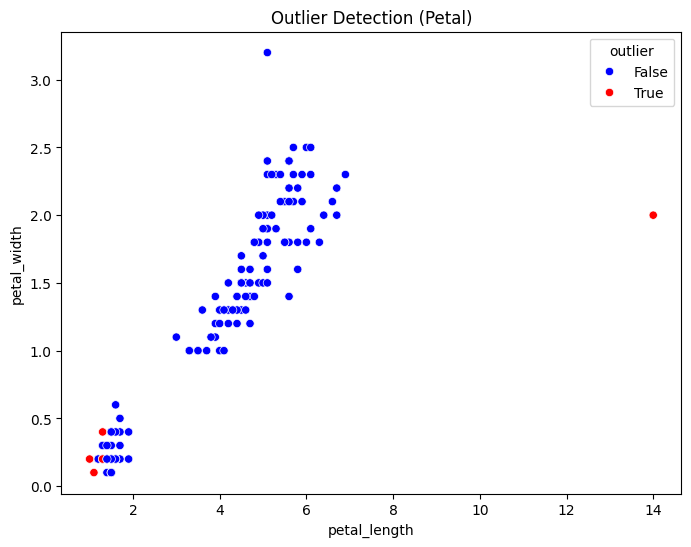

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="ndik-anugrahs15042004-79e6.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_7FsJrvmsNJPSkv0qE-1",
        database="defaultdb",
        port=18856
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mulyono-anugrahs15042004-79e6.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_UrgkI5rl3s3AFs4zUkw",
        database="iris",
        port=18856
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151             ???           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.141421        False
  2     Iris-setosa          14.0          2.0          40.9         30.0     43.517123         True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.264575        False
  4     Iris-setosa           1.5          0.2           4.6          3.1      0.244949        False
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.223607        False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.374166        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.316228        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.200000        False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.346410    

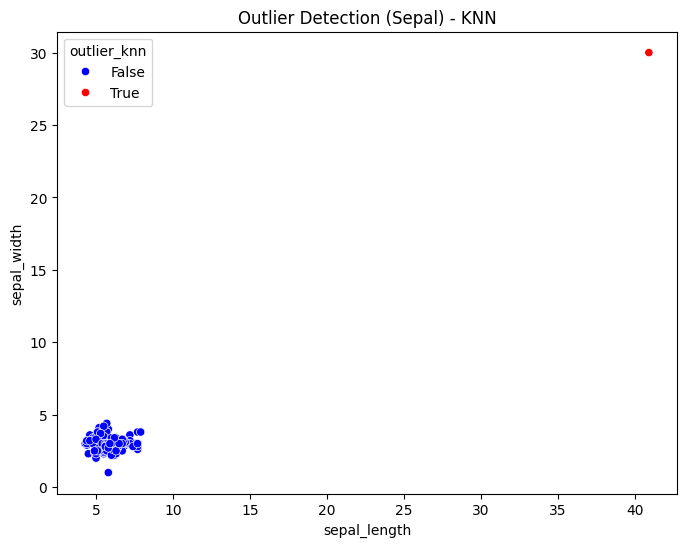

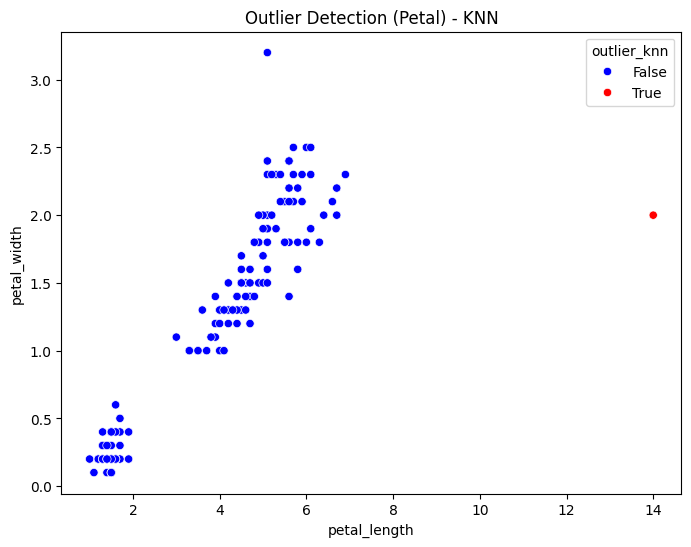

In [1]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="ndik-anugrahs15042004-79e6.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_7FsJrvmsNJPSkv0qE-1",
        database="defaultdb",
        port=18856
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mulyono-anugrahs15042004-79e6.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_UrgkI5rl3s3AFs4zUkw",
        database="iris",
        port=18856
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=5)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Cetak hasil
df_result = df_merged[["id", "class", "petal_length", "petal_width", "sepal_length", "sepal_width", "knn_distance", "outlier_knn"]]
print(df_result.to_string(index=False))
num_outliers = df_merged["outlier_knn"].sum()
print(f"\nJumlah outlier: {num_outliers}")

# Cetak data outlier
outliers = df_merged[df_merged["outlier_knn"]]
print("\nData Outlier:")
print(outliers.to_string(index=False))

# Visualisasi outlier berdasarkan K-NN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal) - KNN")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal) - KNN")
plt.show()

## **Deteksi Outlier dengan metode Local Outlier Factor (LOF) dalam Data Understanding**

### APA ITU LOF
Local Outlier Factor, disingkat LOF adalah algoritme untuk mencari titik-titik data yang menyimpang (anomali) dengan mengukur simpangan setempat tiap titik data terhadap para tetangganya. Algoritma ini diusulkan oleh Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng, dan Jörg Sander pada tahun 2000.
LOF menggunakan konsep yang sama dengan DBSCAN dan OPTICS, yaitu konsep "jarak inti" dan "jarak keterjangkauan" yang sering dipakai dalam perkiraan kerapatan setempat.

### BAGAIMANA TAHAPAN LOF
Tahapan dari metode **Local Outlier Factor (LOF)** dalam mendeteksi outlier adalah sebagai berikut:

1. **Tentukan Jumlah Tetangga (k):**
   Tentukan jumlah tetangga terdekat (k) yang akan digunakan untuk perhitungan kepadatan lokal. Misalnya, `n_neighbors=90` yang berarti setiap titik akan dibandingkan dengan 90 tetangga terdekatnya.

2. **Hitung Jarak K-Tetangga Terdekat:**
   Untuk setiap titik data, hitung jarak ke k tetangga terdekat. Jarak ini digunakan untuk menentukan kepadatan lokal titik data tersebut.

3. **Hitung Kepadatan Lokal:**
   Hitung kepadatan lokal setiap titik data dengan melihat seberapa rapat titik tersebut dengan tetangganya dibandingkan dengan tetangga lainnya. Titik dengan kepadatan rendah lebih cenderung dianggap outlier.

4. **Hitung LOF (Local Outlier Factor):**
   Hitung rasio antara kepadatan lokal titik data terhadap kepadatan lokal tetangganya. Rasio ini disebut **LOF**. Titik dengan LOF yang lebih tinggi menunjukkan bahwa titik tersebut lebih terisolasi atau lebih tidak padat dibandingkan tetangganya, yang mengindikasikan bahwa titik tersebut adalah outlier.

5. **Penetapan Outlier:**
   Tentukan titik yang memiliki LOF lebih besar dari ambang batas tertentu sebagai outlier. Biasanya, titik dengan LOF lebih besar dari 1 dianggap outlier, karena menunjukkan bahwa titik tersebut lebih jarang ditemukan di daerah tersebut dibandingkan dengan tetangganya.

6. **Hasil Prediksi:**
   Setiap titik data diberi label -1 jika dianggap outlier dan 1 jika dianggap normal.
   
### CONTOH MENGHITUNG MANUAL LOF
Berikut adalah cara singkat menghitung **Local Outlier Factor (LOF)** untuk satu titik data dengan dua fitur:

1. **Dataset**:  
   Misalkan data berikut:

| ID | Feature1 | Feature2 |
|----|----------|----------|
| 1  | 2.0      | 3.0      |
| 2  | 3.5      | 4.5      |
| 3  | 5.0      | 6.0      |
| 4  | 6.5      | 7.5      |
| 5  | 8.0      | 9.0      |
| 6  | 9.5      | 10.5     |
| 7  | 11.0     | 12.0     |
| 8  | 12.5     | 13.5     |
| 9  | 14.0     | 15.0     |
|10  | 20.0     | 25.0     |

   Kita akan hitung LOF untuk **titik 5** (8.0, 9.0).

2. **Hitung Jarak Euclidean**:  
   Jarak antara titik 5 dan titik lainnya:
   - Titik 5 ke Titik 4: 2.12
   - Titik 5 ke Titik 6: 2.12

3. **Tentukan k-Tetangga Terdekat** (k=2):  
   Titik 5 memiliki dua tetangga terdekat: titik 4 dan titik 6.

4. **Hitung Reachability Distance**:  
   Reachability distance antara titik 5 dan tetangga:
   - Titik 5 ke Titik 4: 2.12
   - Titik 5 ke Titik 6: 2.12

5. **Hitung Local Reachability Density (LRD)**:  
   $\text{LRD}(5) = \frac{1}{\frac{1}{2} \times (2.12 + 2.12)} = 0.47$

6. **Hitung LOF**:  
   $\text{LOF}(5) = \frac{0.47}{0.47} + \frac{0.47}{0.47} = 2$

7. **Interpretasi**:  
   Karena **LOF = 2** (lebih besar dari 1), titik 5 dianggap **outlier**.

LOF mengukur seberapa terisolasi titik dibandingkan tetangganya. Titik dengan LOF lebih besar dari 1 dianggap outlier.

### IMPLEMENTASI PAKAI SKLEARN UNTUK DATA CONTOH


In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Dataset contoh
data = {
    'ID': list(range(1, 11)),  # Menambahkan ID dari 1 hingga 10
    'Feature1': [2.0, 3.5, 5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 20.0],
    'Feature2': [3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0, 13.5, 15.0, 25.0]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Inisialisasi model LOF dengan k=2 (2 tetangga terdekat)
lof = LocalOutlierFactor(n_neighbors=2)

# Fit model LOF dan prediksi label (1 untuk normal, -1 untuk outlier)
lof_labels = lof.fit_predict(df[['Feature1', 'Feature2']])

# Menambahkan hasil prediksi ke DataFrame
df['LOF Label'] = lof_labels

# Menampilkan hasil
print(df)

# Menampilkan jumlah outlier
num_outliers = (lof_labels == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

# Menampilkan data outlier
outliers = df[df['LOF Label'] == -1]
print("\nData Outlier:")
print(outliers)


   ID  Feature1  Feature2  LOF Label
0   1       2.0       3.0          1
1   2       3.5       4.5          1
2   3       5.0       6.0          1
3   4       6.5       7.5          1
4   5       8.0       9.0          1
5   6       9.5      10.5          1
6   7      11.0      12.0          1
7   8      12.5      13.5          1
8   9      14.0      15.0          1
9  10      20.0      25.0         -1

Jumlah outlier: 1

Data Outlier:
   ID  Feature1  Feature2  LOF Label
9  10      20.0      25.0         -1
